This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

Objective
- Mengelompokan User dengan Metode Unsupervised Learning

## Import Library

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering as SC
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist, pdist 

### Loading Data

In [81]:
data = pd.read_csv("CC GENERAL.csv")

In [82]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [83]:
data.shape

(8950, 18)

Data Memiliki 8950 baris dengan 18 kolom

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [85]:
for i in data.columns:
    print(f"{[i]} \n {data[i].unique()} \n")

['CUST_ID'] 
 ['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190'] 

['BALANCE'] 
 [  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075] 

['BALANCE_FREQUENCY'] 
 [0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667] 

['PURCHASES'] 
 [  95.4     0.    773.17 ...  291.12  144.4  1093.25] 

['ONEOFF_PURCHASES'] 
 [   0.    773.17 1499.   ...  734.4  1012.73 1093.25] 

['INSTALLMENTS_PURCHASES'] 
 [  95.4     0.   1333.28 ...  113.28  291.12  144.4 ] 

['CASH_ADVANCE'] 
 [   0.       6442.945483  205.788017 ... 8555.409326   36.558778
  127.040008] 

['PURCHASES_FREQUENCY'] 
 [0.166667 0.       1.       0.083333 0.666667 0.333333 0

In [86]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [87]:
data.dropna(inplace=True)

In [88]:
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [89]:
data.duplicated().any()

False

Data Tersebut memiliki 314 data yang NaN, disini saya lakukan drop data yang nan karena data tersebut masih sangat sedikit, dan dataset ini tidak ada data yang duplikat

## EDA

In [90]:
data.drop(columns="CUST_ID", inplace=True)

In [91]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [92]:
aa = list(data.columns)
aa

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

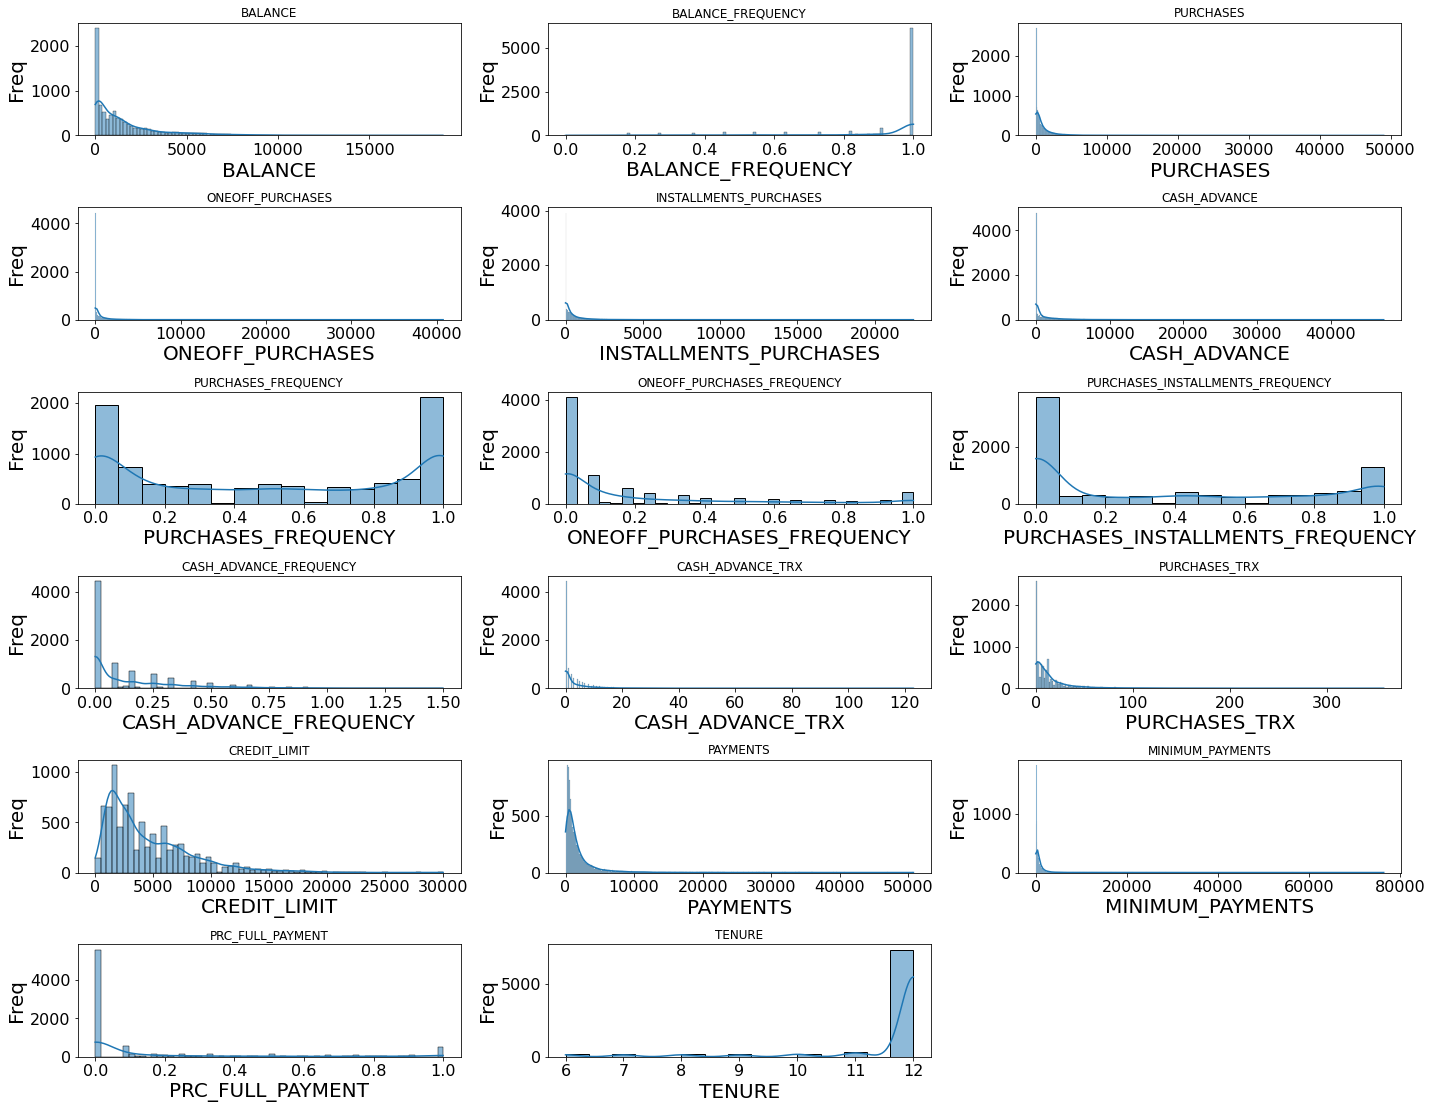

In [93]:
plt.figure(figsize=(20, 20))
for i in range(len(aa)):
    plt.subplot(len(aa)//2, 3, i+1)
    ax = sns.histplot(
        data[aa[i]],
        kde = True
    )
    ax.set_xlabel(str(aa[i]), fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.tick_params(labelsize=16)
    ax.set_title(str(aa[i]))
plt.tight_layout()
plt.show()

In [94]:
data.drop(columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'TENURE'], inplace=True)

Disini saya menghapus kolom yang sekiranya tidak diperlukan seperti kolom2 yang memiliki "FREQUENCY" dan "TENURE" karena saya mengira bahwa kolom ini merupakan kolom categoric

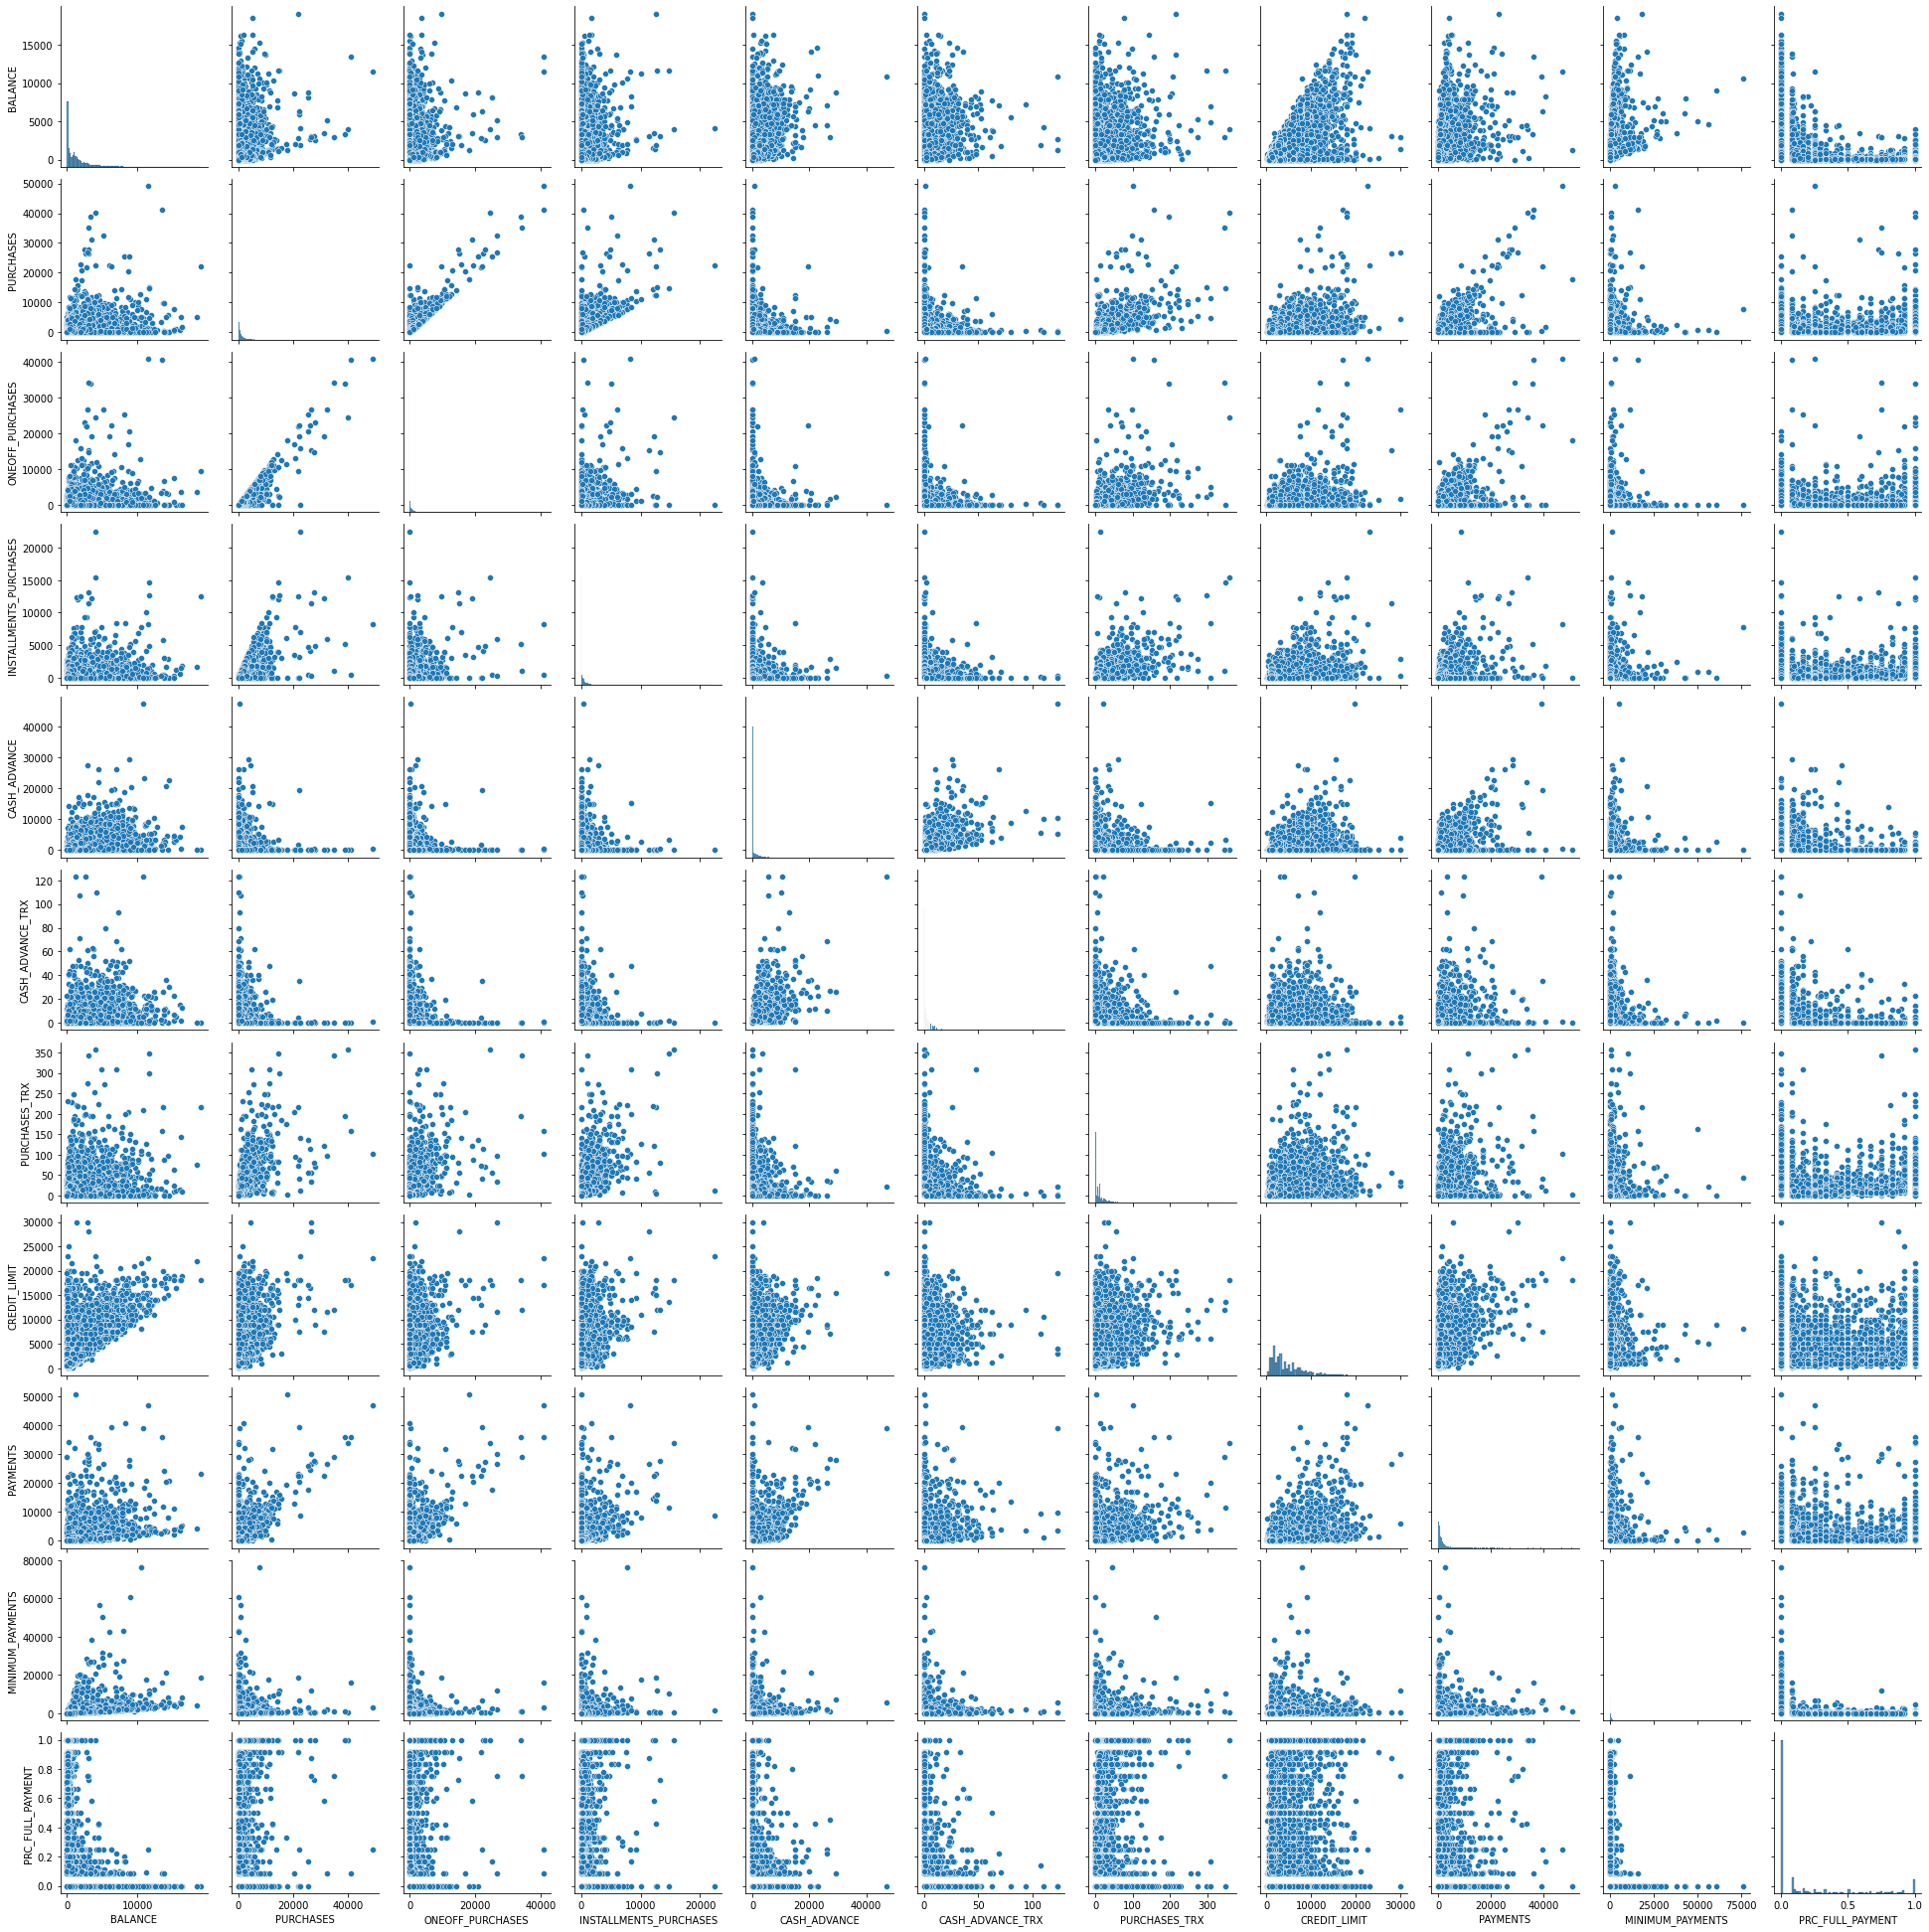

In [95]:
sns.pairplot(data)

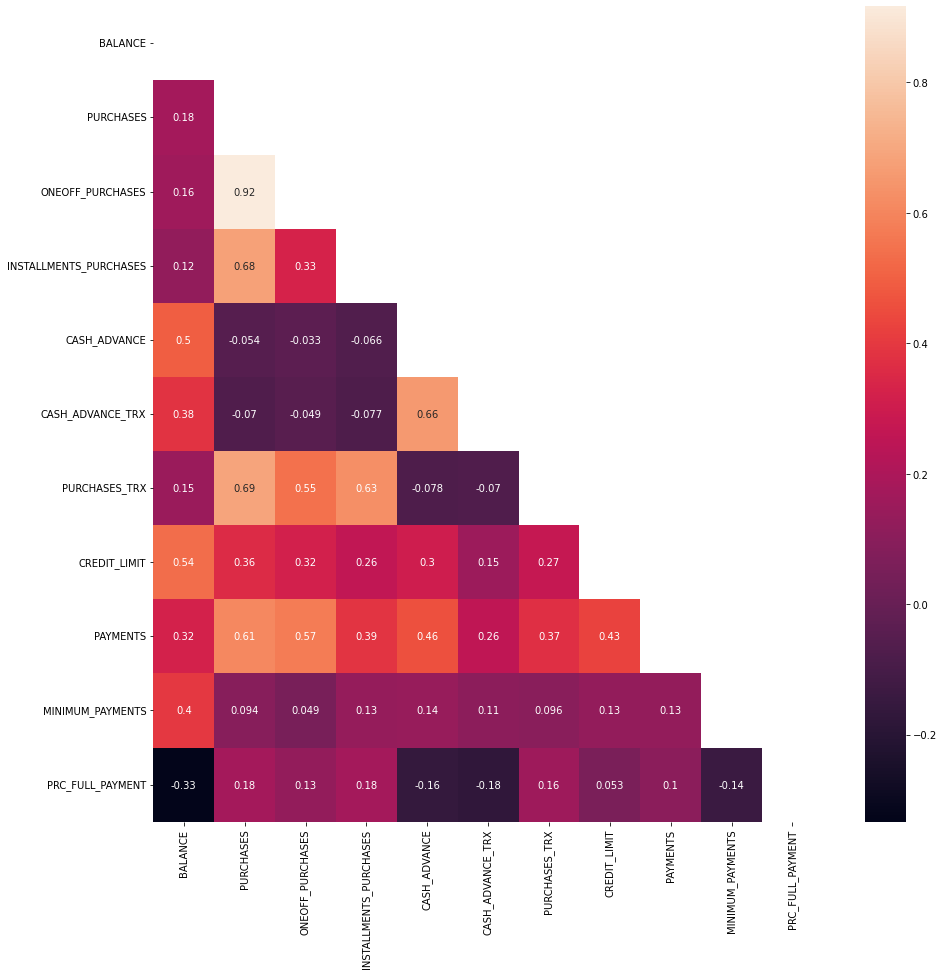

In [96]:
tri = np.triu(np.ones_like(data.corr()))

fig,ax = plt.subplots(figsize=[15,15])

ax = sns.heatmap(data.corr(), mask=tri,annot=True)
plt.show()

Dari Grafik Heatmap dan Scatter plot diatas, ada beberapa kolom yang saling berhubungan satu sama lain, kolom BALANCE cenderung berhubungan dengan kolom yang lainya, dan kolom BALANCE ini sangat berhubungan dengan kolom CREDIT LIMIT, jika dilihat dari Scatter Plot, kolom BALANCE ini semakin tinggi maka akan semakin tinggi pula CREDIT LIMIT dari suatu user

<AxesSubplot:>

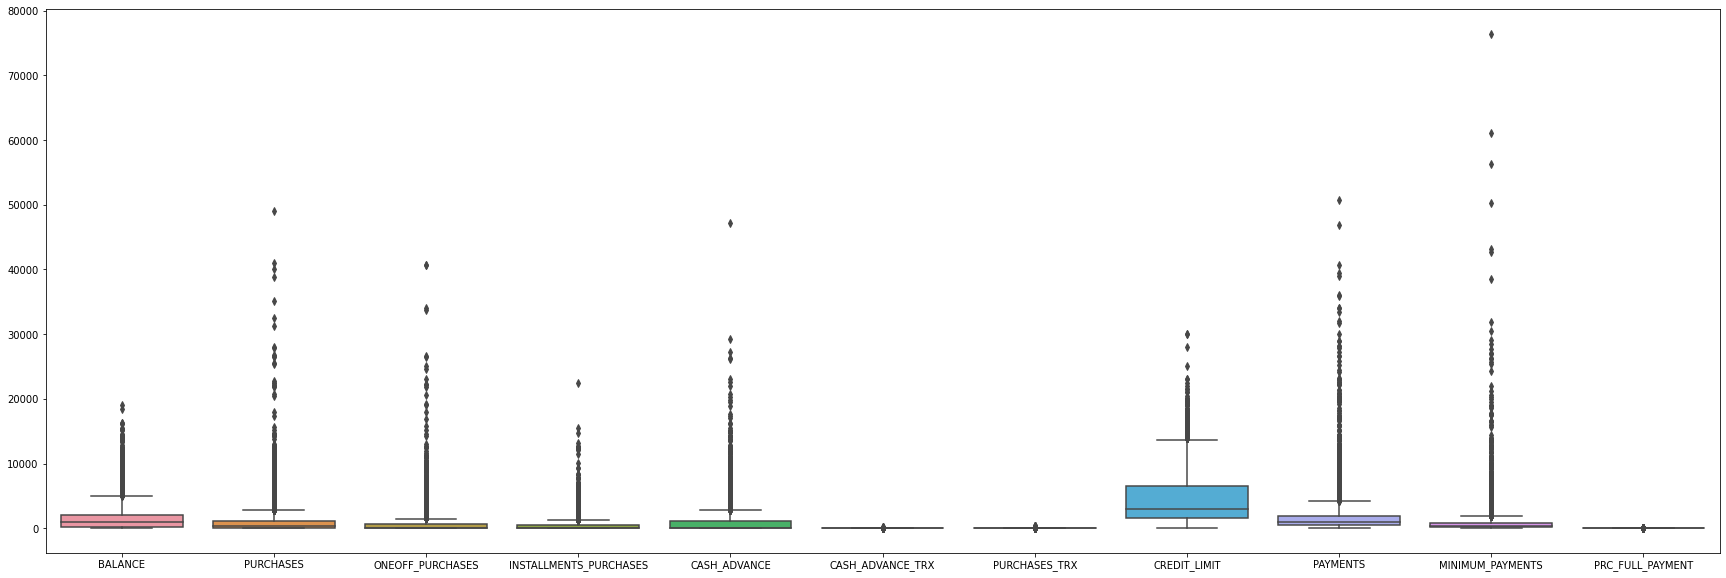

In [97]:
plt.figure(figsize=[30,10])
sns.boxplot(data=data)

In [98]:
data.shape

(8636, 11)

## Handling Outliers

In [99]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

BALANCE                   1957.100664
PURCHASES                 1102.612500
ONEOFF_PURCHASES           599.100000
INSTALLMENTS_PURCHASES     484.147500
CASH_ADVANCE              1132.385490
CASH_ADVANCE_TRX             4.000000
PURCHASES_TRX               17.000000
CREDIT_LIMIT              4900.000000
PAYMENTS                  1532.582853
MINIMUM_PAYMENTS           656.332917
PRC_FULL_PAYMENT             0.166667
dtype: float64


In [100]:
data < (Q1 - 3 * IQR) & (data > (Q3 + 3 * IQR))

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
8943,False,False,False,False,False,False,False,False,False,False,False
8945,False,False,False,False,False,False,False,False,False,False,False
8947,False,False,False,False,False,False,False,False,False,False,False
8948,False,False,False,False,False,False,False,False,False,False,False


In [101]:
data_out = pd.DataFrame(data[~((data < (Q1 - 3 * IQR)) |(data > (Q3 + 3 * IQR))).any(axis=1)])

In [102]:
data_out

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,95.40,0.00,95.40,0.000000,0,2,1000.0,201.802084,139.509787,0.00
2,2495.148862,773.17,773.17,0.00,0.000000,0,12,7500.0,622.066742,627.284787,0.00
4,817.714335,16.00,16.00,0.00,0.000000,0,1,1200.0,678.334763,244.791237,0.00
5,1809.828751,1333.28,0.00,1333.28,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00
7,1823.652743,436.20,0.00,436.20,0.000000,0,12,2300.0,679.065082,532.033990,0.00
...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,20.90,20.90,0.00,0.000000,0,1,500.0,58.644883,43.473717,0.00
8945,28.493517,291.12,0.00,291.12,0.000000,0,6,1000.0,325.594462,48.886365,0.50
8947,23.398673,144.40,0.00,144.40,0.000000,0,5,1000.0,81.270775,82.418369,0.25
8948,13.457564,0.00,0.00,0.00,36.558778,2,0,500.0,52.549959,55.755628,0.25


In [103]:
data_out.shape

(6117, 11)

Disini saya melakukan handling outliers dengan menggunakan metode 3*IQR, karena metode Clustering ini sangat sensitif dengan outliers, dan saya pakai 3 X IQR karena ingin menghapus data yang sudah sangat jauh dari tren data ini.

## K-Means

In [104]:
scaler=StandardScaler()
data_std=scaler.fit_transform(data_out)

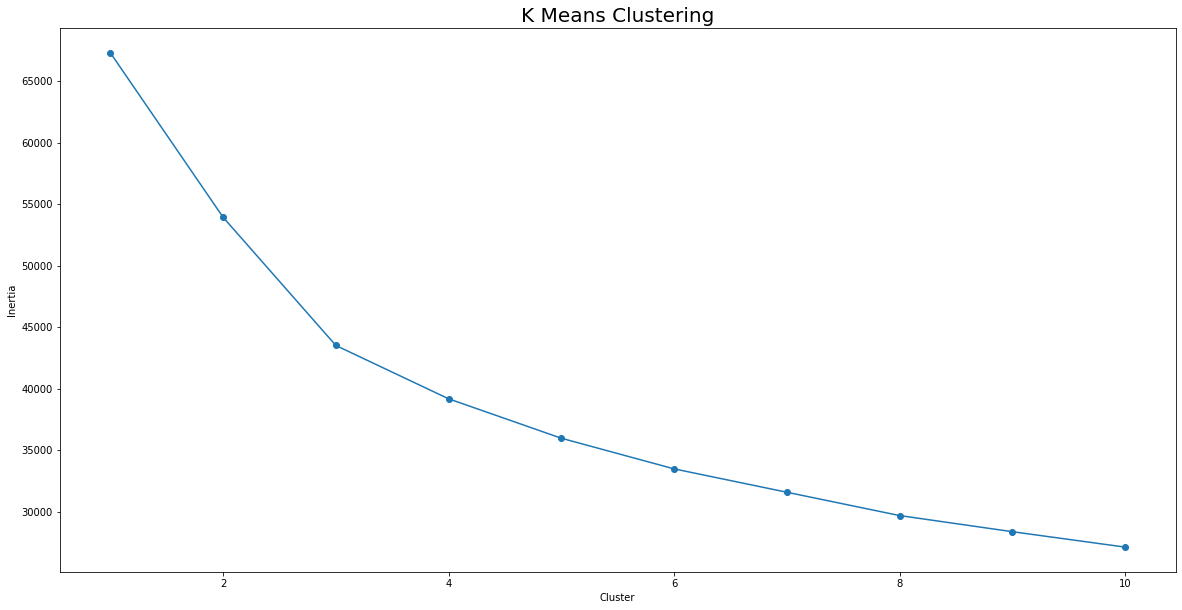

In [105]:
iner = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 100, random_state = 15)
    kmeans.fit(data_std)
    iner.append(kmeans.inertia_)

plt.figure(figsize=(20,10))
plt.plot(range(1, 11), iner, marker ="o")
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Cluster')
plt.ylabel('Inertia')
plt.show()

Berdasarkan Elbow Method, secara visual, nilai cluster 3 menurut saya yang paling bagus

In [106]:
for i in range(2, 10):
    score = silhouette_score(data_std, KMeans(n_clusters = i).fit_predict(data_std))
    print(f'Silhouette score for {i} clusters:', '%.3f' % score)

Silhouette score for 2 clusters: 0.313
Silhouette score for 3 clusters: 0.292
Silhouette score for 4 clusters: 0.255
Silhouette score for 5 clusters: 0.242
Silhouette score for 6 clusters: 0.243
Silhouette score for 7 clusters: 0.228
Silhouette score for 8 clusters: 0.229
Silhouette score for 9 clusters: 0.221


Berdasarkan Silhouette score, nilai kluster 2 yang paling bagus, namun saya memilih kluster 3 agar terlihat pola pembagian klusternya

In [107]:
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 15)
kmeans.fit(data_std)


label_kmeans = kmeans.labels_
label_kmeans

array([0, 0, 0, ..., 0, 0, 0])

## Spektral Clustering

In [108]:
for g in [i/100 for i in range(1,2)]:
    for u in range(2,10):
        print('\neps={}'.format(g))
        print('min_samples={}'.format(u))
        scl = SC(gamma=g, n_clusters=u)
        labels = scl.fit_predict(data_std)
        silh = silhouette_score(data_std, labels)
        print('Silhouette Score: {}'.format(silh))


eps=0.01
min_samples=2
Silhouette Score: 0.29457253006118406

eps=0.01
min_samples=3
Silhouette Score: 0.30716839870374574

eps=0.01
min_samples=4
Silhouette Score: 0.2619921851523658

eps=0.01
min_samples=5
Silhouette Score: 0.25223224195731103

eps=0.01
min_samples=6
Silhouette Score: 0.25238831323400096

eps=0.01
min_samples=7
Silhouette Score: 0.24230133612737617

eps=0.01
min_samples=8
Silhouette Score: 0.21977069553436773

eps=0.01
min_samples=9
Silhouette Score: 0.21857269398687273


In [109]:
scl = SC(n_clusters=3, gamma=0.01, random_state=10)
scl.fit(data_std)

SpectralClustering(gamma=0.01, n_clusters=3, random_state=10)

In [110]:
scl.labels_

array([0, 0, 0, ..., 0, 0, 0])

Dari Spektral Clustering, nilai samples 3 yang lebih bagus niali silhouette scorenya

In [111]:
data_out["CLUSTER"] = scl.labels_

In [112]:
data_out

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,CLUSTER
0,40.900749,95.40,0.00,95.40,0.000000,0,2,1000.0,201.802084,139.509787,0.00,0
2,2495.148862,773.17,773.17,0.00,0.000000,0,12,7500.0,622.066742,627.284787,0.00,0
4,817.714335,16.00,16.00,0.00,0.000000,0,1,1200.0,678.334763,244.791237,0.00,0
5,1809.828751,1333.28,0.00,1333.28,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,2
7,1823.652743,436.20,0.00,436.20,0.000000,0,12,2300.0,679.065082,532.033990,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,20.90,20.90,0.00,0.000000,0,1,500.0,58.644883,43.473717,0.00,0
8945,28.493517,291.12,0.00,291.12,0.000000,0,6,1000.0,325.594462,48.886365,0.50,0
8947,23.398673,144.40,0.00,144.40,0.000000,0,5,1000.0,81.270775,82.418369,0.25,0
8948,13.457564,0.00,0.00,0.00,36.558778,2,0,500.0,52.549959,55.755628,0.25,0


Dari kedua model clustering, didapatkan nilai cluster 3, dari silhouette score, nilai spektral clustering lebih baik dari k-means, sehingga untuk clustering ini saya memilih model spectral clustering

## PCA Plot Spectral Clustering

In [113]:
pca = PCA(n_components=2)
pca2 = pca.fit_transform(data_std)

In [114]:
pca_data = pd.DataFrame(data = pca2, columns = ['C1','C2'])
pca_data

,C1,C2
0,-1.093474,-1.812525
1,0.661535,0.571120
2,-1.234753,-1.292756
3,1.569740,1.590567
4,0.014420,-0.442316
...,...,...
6112,-1.327622,-2.017396
6113,-0.002785,-2.471705
6114,-0.634424,-2.217297
6115,-1.269338,-2.120780


In [115]:
pca_data = pd.concat([pca_data, pd.DataFrame({'Cluster':scl.labels_})],axis=1)
pca_data

,C1,C2,Cluster
0,-1.093474,-1.812525,0
1,0.661535,0.571120,0
2,-1.234753,-1.292756,0
3,1.569740,1.590567,2
4,0.014420,-0.442316,0
...,...,...,...
6112,-1.327622,-2.017396,0
6113,-0.002785,-2.471705,0
6114,-0.634424,-2.217297,0
6115,-1.269338,-2.120780,0


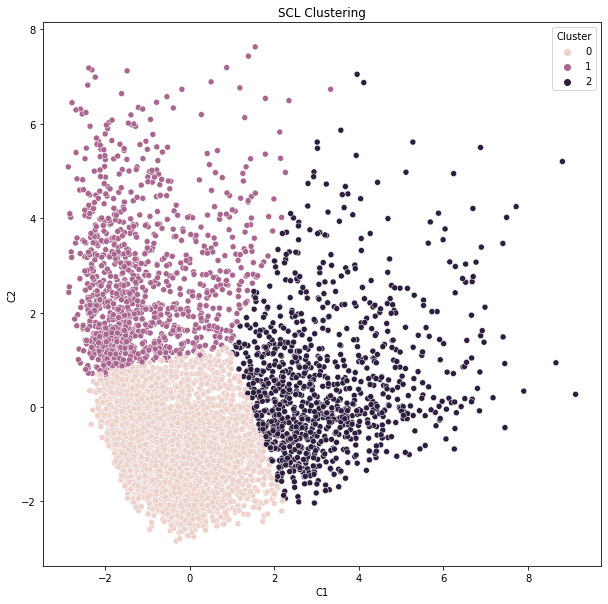

In [116]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='C1',y='C2',hue='Cluster',data=pca_data)
plt.title ('SCL Clustering')
plt.show()

## PCA Plot K-Means Clustering

In [119]:
pca = PCA(n_components=2)
pca3 = pca.fit_transform(data_std)

In [120]:
pca_data_kmean = pd.DataFrame(data = pca3, columns = ['C1','C2'])
pca_data_kmean

,C1,C2
0,-1.093474,-1.812525
1,0.661535,0.571120
2,-1.234753,-1.292756
3,1.569740,1.590567
4,0.014420,-0.442316
...,...,...
6112,-1.327622,-2.017396
6113,-0.002785,-2.471705
6114,-0.634424,-2.217297
6115,-1.269338,-2.120780


In [121]:
pca_datak = pd.concat([pca_data_kmean, pd.DataFrame({'Cluster':kmeans.labels_})],axis=1)
pca_datak

,C1,C2,Cluster
0,-1.093474,-1.812525,0
1,0.661535,0.571120,0
2,-1.234753,-1.292756,0
3,1.569740,1.590567,1
4,0.014420,-0.442316,0
...,...,...,...
6112,-1.327622,-2.017396,0
6113,-0.002785,-2.471705,0
6114,-0.634424,-2.217297,0
6115,-1.269338,-2.120780,0


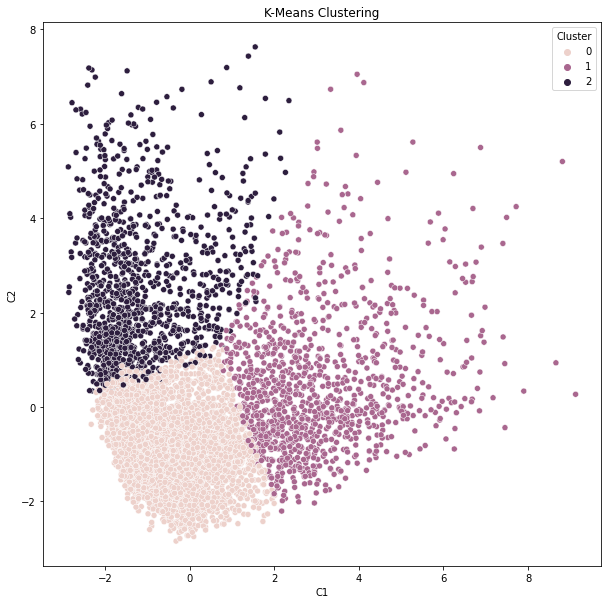

In [123]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='C1',y='C2',hue='Cluster',data=pca_datak)
plt.title ('K-Means Clustering')
plt.show()

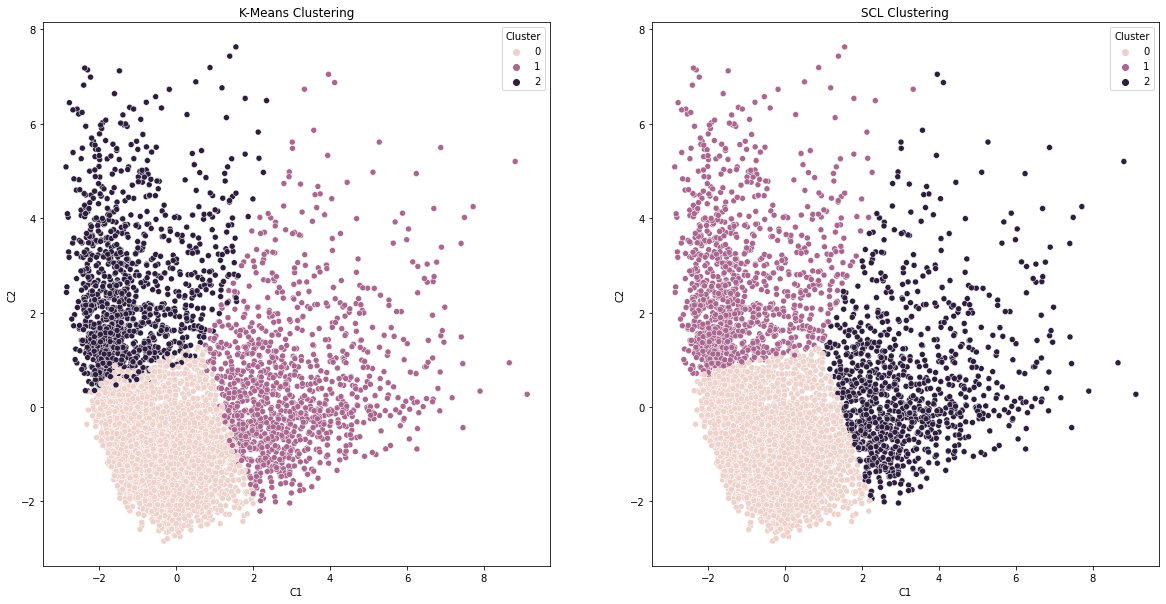

In [125]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.scatterplot(x='C1',y='C2',hue='Cluster',data=pca_datak)
plt.title ('K-Means Clustering')

plt.subplot(122)
sns.scatterplot(x='C1',y='C2',hue='Cluster',data=pca_data)
plt.title ('SCL Clustering')

plt.show()

Dari plotting dengan PCA, pembagian dari kedua model klasifikasi ini sudah cukup jelas dan tidak berbeda satu sama lain

In [135]:
data_out

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,CLUSTER
0,40.900749,95.40,0.00,95.40,0.000000,0,2,1000.0,201.802084,139.509787,0.00,0
2,2495.148862,773.17,773.17,0.00,0.000000,0,12,7500.0,622.066742,627.284787,0.00,0
4,817.714335,16.00,16.00,0.00,0.000000,0,1,1200.0,678.334763,244.791237,0.00,0
5,1809.828751,1333.28,0.00,1333.28,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,2
7,1823.652743,436.20,0.00,436.20,0.000000,0,12,2300.0,679.065082,532.033990,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,20.90,20.90,0.00,0.000000,0,1,500.0,58.644883,43.473717,0.00,0
8945,28.493517,291.12,0.00,291.12,0.000000,0,6,1000.0,325.594462,48.886365,0.50,0
8947,23.398673,144.40,0.00,144.40,0.000000,0,5,1000.0,81.270775,82.418369,0.25,0
8948,13.457564,0.00,0.00,0.00,36.558778,2,0,500.0,52.549959,55.755628,0.25,0


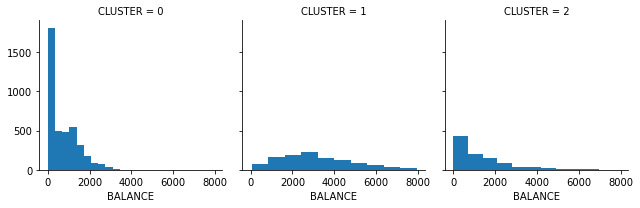

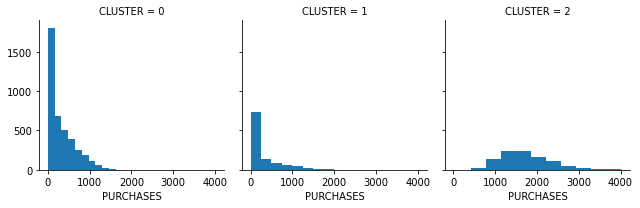

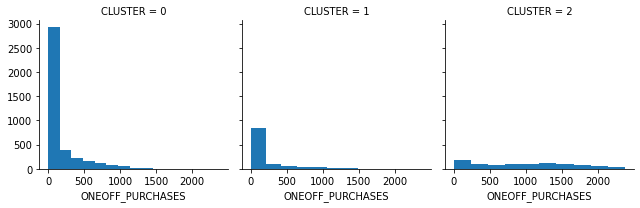

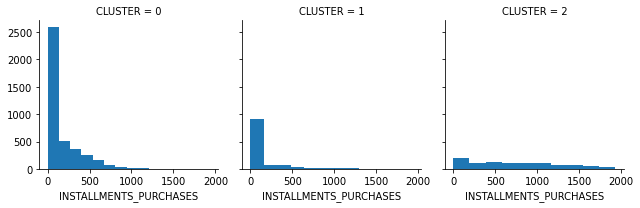

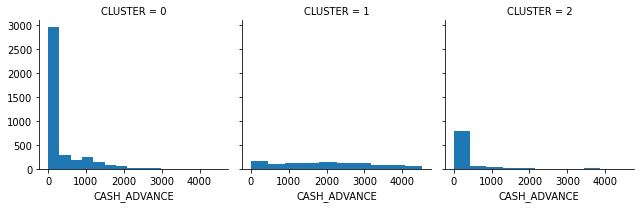

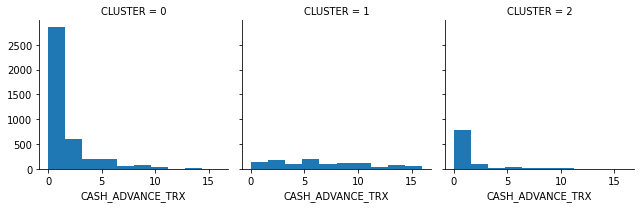

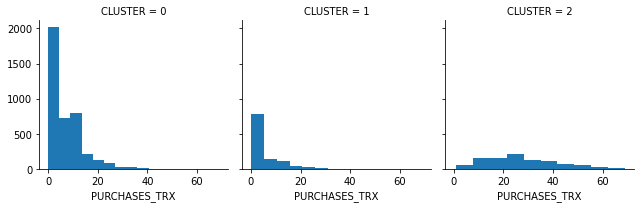

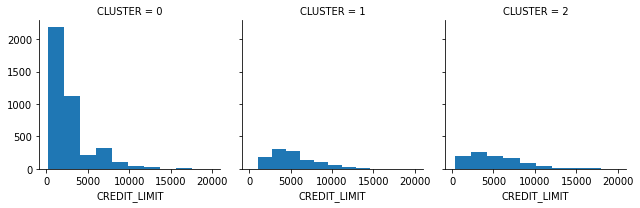

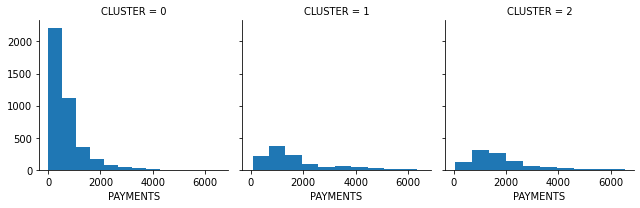

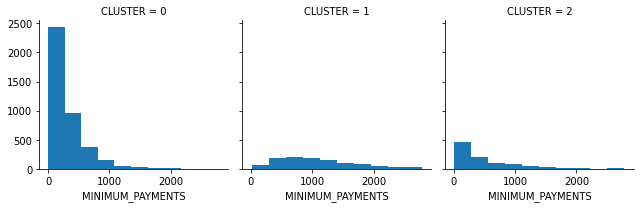

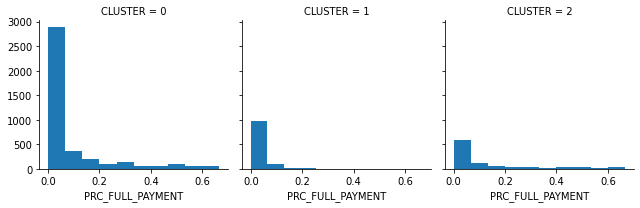

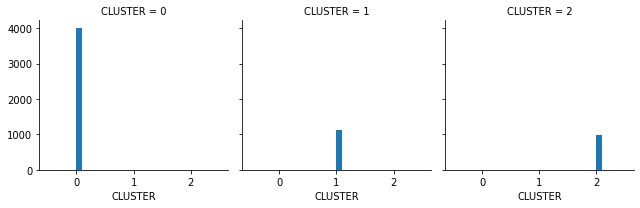

In [117]:
for c in data_out:
    grid= sns.FacetGrid(data_out, col='CLUSTER')
    grid.map(plt.hist, c)

## Kesimpulan

Berdasarkan Grafik pembagian cluster, dapat digambarkan:

Cluster 0:
- Memiliki Balance yang rendah dibandingkan Cluster lain
- Karena Balance yang rendah, maka Credit limit di cluster ini juga merupakan yang paling rendah
- Memiliki Purchases yang paling rendah
- Installment purchases yang rendah
- cash advance yang rendah
- payments dan minimum payments yang rendah

cluster 1:
- Memiliki Balance yang paling tinggi
- Credit limit di cluster ini juga merupakan yang paling tinggi
- Memiliki Purchases di rentang yang sedang
- Installment purchases yang sedang
- cash advance yang tinggi
- payments dan minimum payments yang tinggi

cluster 2:
- Memiliki Balance yang lebih tinggi dari cluster 0 dan rendah dibandingkan cluster 1
- Credit limit di cluster ini juga berada di rentang yang sedang
- Memiliki Purchases yang tinggi
- Installment purchases yang tinggi
- cash advance yang sedang
- payments dan minimum payments yang tinggi

jadi kesimpulanya adalah cluster 0 merupakan user yang berada di kelas bawah, dimana cluster ini dari segi frequensi adalah yang paling banyak, sedangkan kluster 2 merupakan kelas menengah, kluster ini juga merupakan kelas yang memiliki user paling rendah, sedangkan kluster 1 merupakan kelas atas, dimanana dari segi balance, purchase dan credit limit, kelas ini yang paling tinggi, namun untuk jumlah user, kelas ini masih sangat sedikit jika dibandingkan dengan kelas 0

